In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

house = pd.read_csv('Philadelphia_Crime_Rate_noNA.csv')

house.head()

,HousePrice,"HsPrc ($10,000)",CrimeRate,MilesPhila,PopChg,Name,County
0,140463,14.0463,29.7,10.0,-1.0,Abington,Montgome
1,113033,11.3033,24.1,18.0,4.0,Ambler,Montgome
2,124186,12.4186,19.5,25.0,8.0,Aston,Delaware
3,110490,11.0490,49.4,25.0,2.7,Bensalem,Bucks
4,79124,7.9124,54.1,19.0,3.9,Bristol B.,Bucks


## Fit the regression model using crime as the feature

In [3]:
from sklearn import linear_model

training_data_features = np.array([house['CrimeRate']]).T
training_data_targets = np.array([house['HousePrice']]).T
lin_reg_model = linear_model.LinearRegression().fit(training_data_features, training_data_targets)

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

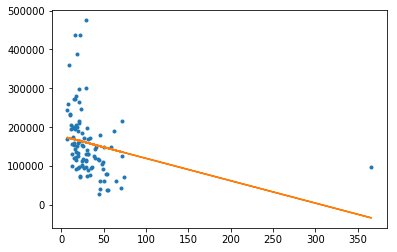

In [7]:
plt.plot(house['CrimeRate'],house['HousePrice'],'.',
        house['CrimeRate'],lin_reg_model.predict(np.array([house['CrimeRate']]).T),'-')

## Remove Center City and redo the analysis

Center City is the one observation with an extremely high crime rate, yet house prices are not very low. This point does not follow the trend of the rest of the data very well. A question is how much including Center City is influencing our fit on the other datapoints. Let's remove this datapoint and see what happens.

In [9]:
house_noCC = house[house['MilesPhila'] != 0.0] 
house_noCC.head()

,HousePrice,"HsPrc ($10,000)",CrimeRate,MilesPhila,PopChg,Name,County
0,140463,14.0463,29.7,10.0,-1.0,Abington,Montgome
1,113033,11.3033,24.1,18.0,4.0,Ambler,Montgome
2,124186,12.4186,19.5,25.0,8.0,Aston,Delaware
3,110490,11.0490,49.4,25.0,2.7,Bensalem,Bucks
4,79124,7.9124,54.1,19.0,3.9,Bristol B.,Bucks


Refit our simple regression model on this modified dataset:

In [10]:
training_data_features_noCC = np.array([house_noCC['CrimeRate']]).T
training_data_targets_noCC = np.array([house_noCC['HousePrice']]).T
lin_reg_model_noCC = linear_model.LinearRegression().fit(training_data_features_noCC, training_data_targets_noCC)

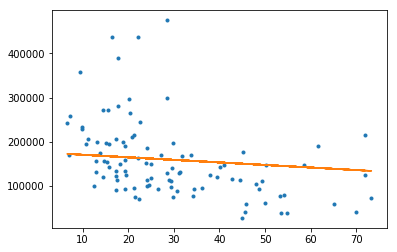

In [11]:
plt.plot(house_noCC['CrimeRate'],house_noCC['HousePrice'],'.',
        house_noCC['CrimeRate'],lin_reg_model.predict(np.array([house_noCC['CrimeRate']]).T),'-')

Compare coefficients for full-data fit versus no-Center-City fit

In [13]:
fulldata_intercept = lin_reg_model.intercept_[0]
fulldata_slope = lin_reg_model.coef_[0][0]
print("intercept for full-data", fulldata_intercept)
print("slope for full-data", fulldata_slope)

noCC_intercept = lin_reg_model_noCC.intercept_[0]
noCC_slope = lin_reg_model_noCC.coef_[0][0]
print("intercept for no-Center-City-data", noCC_intercept)
print("slope for no-Center_City-data", noCC_slope)

intercept for full-data 176629.408107
slope for full-data -576.908127682
intercept for no-Center-City-data 225233.551839
slope for no-Center_City-data -2288.68942995


## Remove high-value outlier neighborhoods and redo analysis

In [14]:
house_nohighend = house_noCC[house_noCC['HousePrice'] < 350000]
house_nohighend.head()

,HousePrice,"HsPrc ($10,000)",CrimeRate,MilesPhila,PopChg,Name,County
0,140463,14.0463,29.7,10.0,-1.0,Abington,Montgome
1,113033,11.3033,24.1,18.0,4.0,Ambler,Montgome
2,124186,12.4186,19.5,25.0,8.0,Aston,Delaware
3,110490,11.0490,49.4,25.0,2.7,Bensalem,Bucks
4,79124,7.9124,54.1,19.0,3.9,Bristol B.,Bucks


Refit our simple regression model on this modified dataset:

In [15]:
training_data_features_nohighend = np.array([house_nohighend['CrimeRate']]).T
training_data_targets_nohighend = np.array([house_nohighend['HousePrice']]).T
lin_reg_model_nohighend = linear_model.LinearRegression().fit(training_data_features_nohighend, training_data_targets_nohighend)

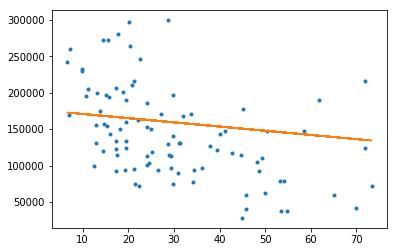

In [16]:
plt.plot(house_nohighend['CrimeRate'],house_nohighend['HousePrice'],'.',
        house_nohighend['CrimeRate'],lin_reg_model.predict(np.array([house_nohighend['CrimeRate']]).T),'-')

In [17]:
nohighend_intercept = lin_reg_model_nohighend.intercept_[0]
nohighend_slope = lin_reg_model_nohighend.coef_[0][0]
print("intercept for no-high-value-outlier-neighborhoods-data", nohighend_intercept)
print("slope for no-high-value-outlier-neighborhoods-data", nohighend_slope)

intercept for no-high-value-outlier-neighborhoods-data 199098.85267
slope for no-high-value-outlier-neighborhoods-data -1838.56264859
